In [10]:
import pandas as pd

# Load both CSV files
file_64ch = "./models-64ch-tasks12-200epoch-test-accuracys.csv"
file_8ch = "./models-8ch-tasks12-200epoch-test-accuracys.csv"
df_64ch = pd.read_csv(file_64ch).dropna(subset=['Task 1', 'Task 2']).copy()
df_8ch = pd.read_csv(file_8ch).dropna(subset=['Task 1', 'Task 2']).copy()

# Compute accuracy difference
df_64ch['Difference'] = df_64ch['Task 1'] - df_64ch['Task 2']
df_8ch['Difference'] = df_8ch['Task 1'] - df_8ch['Task 2']

# Compute summary statistics
summary_stats = pd.DataFrame({
    'Configuration': ['64-channel', '8-channel'],
    'Mean Movement Accuracy': [df_64ch['Task 1'].mean(), df_8ch['Task 1'].mean()],
    'Mean Imagery Accuracy': [df_64ch['Task 2'].mean(), df_8ch['Task 2'].mean()],
    'Mean Difference': [df_64ch['Difference'].mean(), df_8ch['Difference'].mean()],
    'STD of Difference': [df_64ch['Difference'].std(), df_8ch['Difference'].std()],
    'N Subjects': [len(df_64ch), len(df_8ch)],
})

print(summary_stats)

  Configuration  Mean Movement Accuracy  Mean Imagery Accuracy  \
0    64-channel               76.508401              72.765675   
1     8-channel               69.226815              67.488551   

   Mean Difference  STD of Difference  N Subjects  
0         3.742726          14.247671         109  
1         1.738263          13.935869         109  


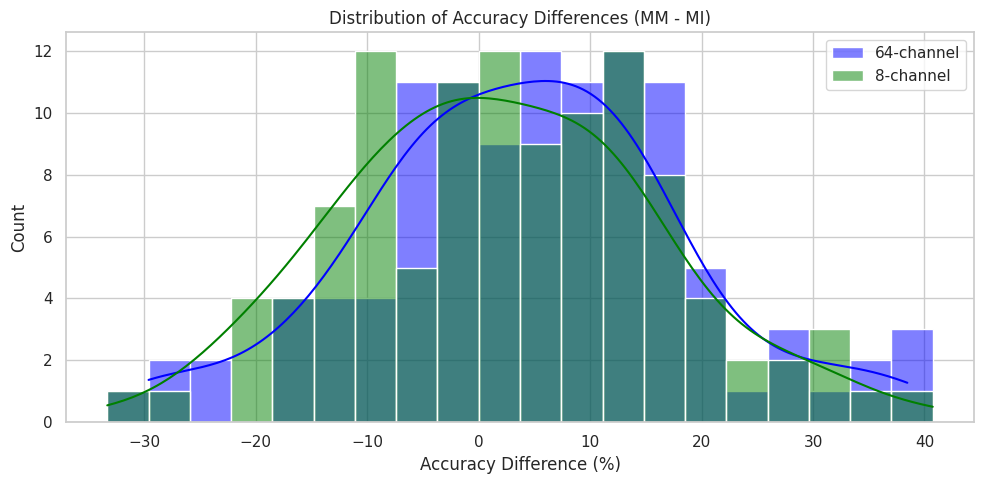

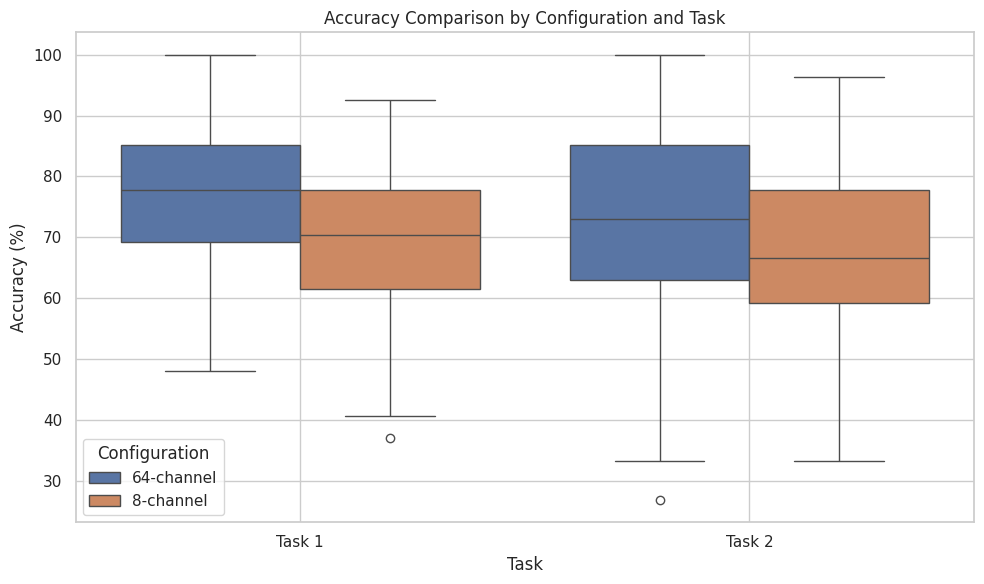

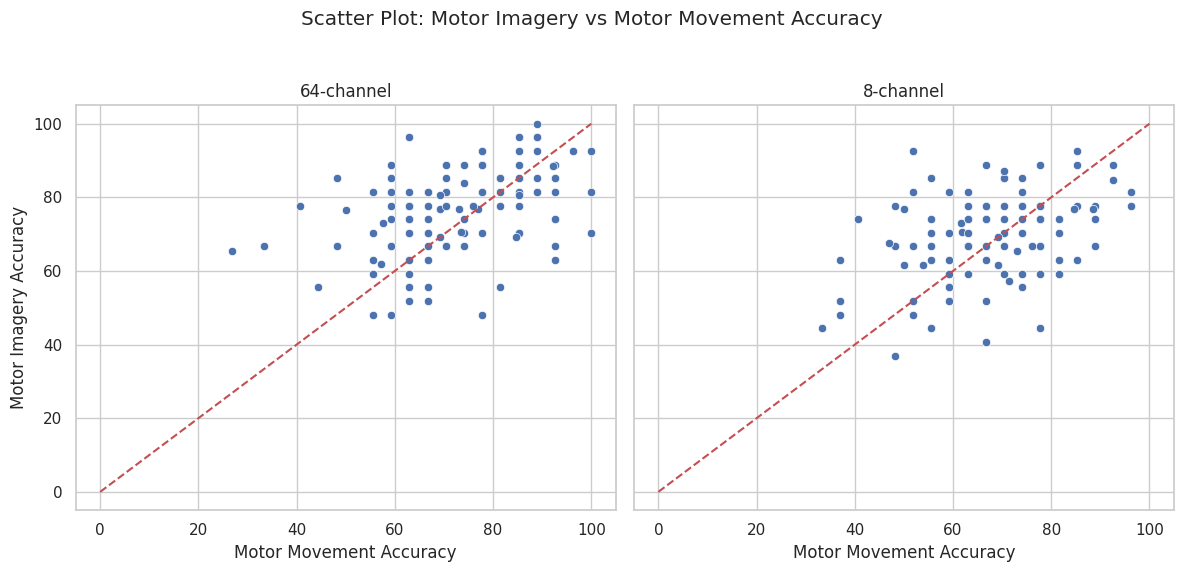

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define common bin edges
min_diff = min(df_64ch['Difference'].min(), df_8ch['Difference'].min())
max_diff = max(df_64ch['Difference'].max(), df_8ch['Difference'].max())
bins = np.linspace(min_diff, max_diff, 21)

# Plot aligned histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(df_64ch['Difference'], bins=bins, kde=True, color='blue', label='64-channel', stat='count')
sns.histplot(df_8ch['Difference'], bins=bins, kde=True, color='green', label='8-channel', stat='count')
plt.title("Distribution of Accuracy Differences (MM - MI)")
plt.xlabel("Accuracy Difference (%)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.savefig("./figures/accuracy_difference_histogram_aligned.png")
plt.show()

# # Set style
# sns.set(style="whitegrid")

# # Create histograms of differences for both configurations
# plt.figure(figsize=(10, 5))
# sns.histplot(df_64ch['Difference'], kde=True, color='blue', label='64-channel', bins=20)
# sns.histplot(df_8ch['Difference'], kde=True, color='green', label='8-channel', bins=20)
# plt.title("Distribution of Accuracy Differences (Imagery - Movement)")
# plt.xlabel("Accuracy Difference (%)")
# plt.ylabel("Count")
# plt.legend()
# plt.tight_layout()
# plt.savefig("./figures/accuracy_difference_histogram_both.png")
# plt.show()

# Boxplot comparison for both configurations
df_64ch_melted = df_64ch[['Task 1', 'Task 2']].copy()
df_64ch_melted['Configuration'] = '64-channel'

df_8ch_melted = df_8ch[['Task 1', 'Task 2']].copy()
df_8ch_melted['Configuration'] = '8-channel'

combined_df = pd.concat([df_64ch_melted, df_8ch_melted], ignore_index=True)
melted = pd.melt(combined_df, id_vars='Configuration', var_name='Task', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Task', y='Accuracy', hue='Configuration')
plt.title("Accuracy Comparison by Configuration and Task")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("./figures/accuracy_boxplot_both.png")
plt.show()

# Scatter plot of Task 1 vs Task 2 for both
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
for ax, data, title in zip(axs, [df_64ch, df_8ch], ['64-channel', '8-channel']):
    sns.scatterplot(x='Task 2', y='Task 1', data=data, ax=ax)
    ax.plot([0, 100], [0, 100], 'r--')
    ax.set_title(title)
    ax.set_xlabel("Motor Movement Accuracy")
    ax.set_ylabel("Motor Imagery Accuracy")

plt.suptitle("Scatter Plot: Motor Imagery vs Motor Movement Accuracy")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("./figures/accuracy_scatterplot_both.png")
plt.show()


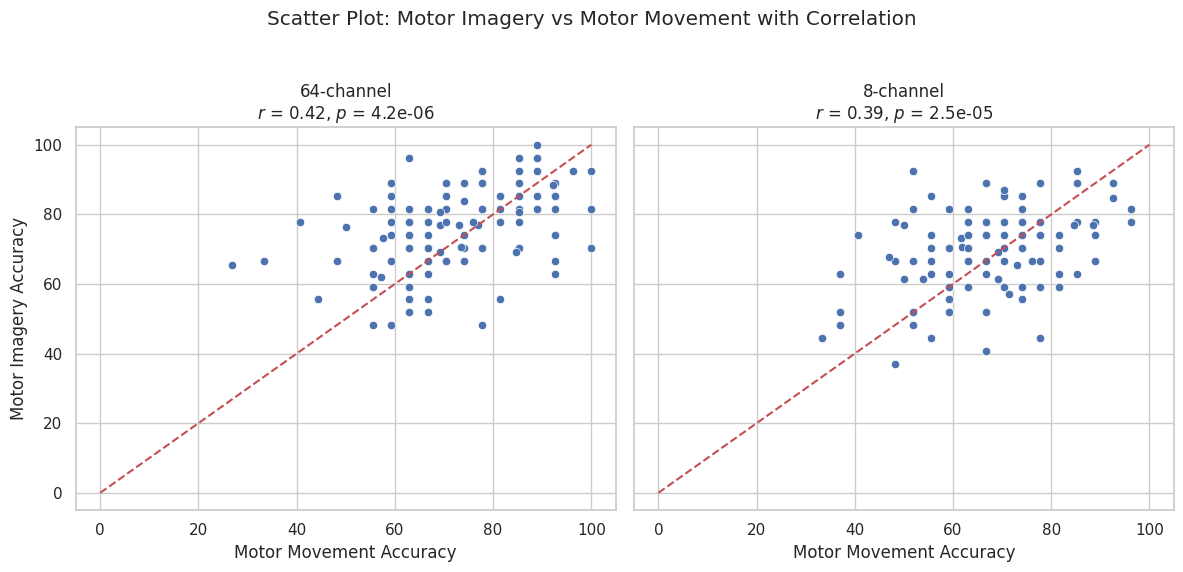

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df_64ch = pd.read_csv("./models-64ch-tasks12-200epoch-test-accuracys.csv").dropna(subset=['Task 1', 'Task 2']).copy()
df_8ch = pd.read_csv("./models-8ch-tasks12-200epoch-test-accuracys.csv").dropna(subset=['Task 1', 'Task 2']).copy()

# Compute correlations
r_64ch, p_64ch = pearsonr(df_64ch['Task 2'], df_64ch['Task 1'])
r_8ch, p_8ch = pearsonr(df_8ch['Task 2'], df_8ch['Task 1'])

# Create scatter plots
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# 64-channel
sns.scatterplot(x='Task 2', y='Task 1', data=df_64ch, ax=axs[0])
axs[0].plot([0, 100], [0, 100], 'r--')
axs[0].set_title(f'64-channel\n$r$ = {r_64ch:.2f}, $p$ = {p_64ch:.2g}')
axs[0].set_xlabel("Motor Movement Accuracy")
axs[0].set_ylabel("Motor Imagery Accuracy")

# 8-channel
sns.scatterplot(x='Task 2', y='Task 1', data=df_8ch, ax=axs[1])
axs[1].plot([0, 100], [0, 100], 'r--')
axs[1].set_title(f'8-channel\n$r$ = {r_8ch:.2f}, $p$ = {p_8ch:.2g}')
axs[1].set_xlabel("Motor Movement Accuracy")
axs[1].set_ylabel("")

plt.suptitle("Scatter Plot: Motor Imagery vs Motor Movement with Correlation")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("./accuracy_scatterplot_with_corr.png")
plt.show()


/tmp/ipykernel_57942/3301202711.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = valid_df.groupby('Quartile')[['Task 1', 'Task 2', 'Difference']].mean().reset_index()


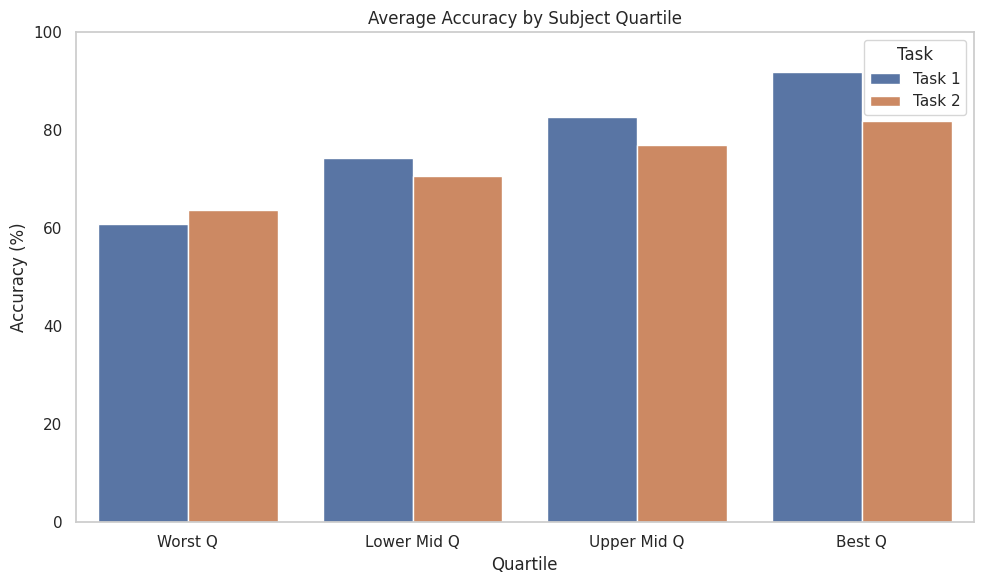

In [ ]:
import pandas as pd

file_path = "./models-64ch-tasks12-200epoch-test-accuracys.csv"
df = pd.read_csv(file_path)

# Remove rows with NaNs only
valid_df = df.dropna(subset=['Task 1', 'Task 2']).copy()

# Recompute difference
valid_df['Difference'] = valid_df['Task 1'] - valid_df['Task 2']

# Split subjects into quartiles based on accuracy difference
quartiles = pd.qcut(valid_df['Task 1'], 4, labels=['Worst Q', 'Lower Mid Q', 'Upper Mid Q', 'Best Q'])
valid_df['Quartile'] = quartiles

# Compute mean accuracy by quartile
group_stats = valid_df.groupby('Quartile')[['Task 1', 'Task 2', 'Difference']].mean().reset_index()

# Bar plot: Average accuracies by quartile group
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
grouped_plot = pd.melt(group_stats, id_vars='Quartile', value_vars=['Task 1', 'Task 2'],
                       var_name='Task', value_name='Accuracy')

sns.barplot(data=grouped_plot, x='Quartile', y='Accuracy', hue='Task')
plt.title("Average Accuracy by Subject Quartile")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
